# Simulate binary and catepillar tree

Mamie Wang 05/11/20

Goal: 

- Additional test of the spectral tree method on two simulated datasets
- plot the influenza tree as an example
- organize the result from influenza tree

In [2]:
import sys, os

sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'../spectral-tree-inference/spectraltree'))

import numpy as np
import utils
import generation
import reconstruct_tree
import dendropy
import scipy
import time
from itertools import product
import matplotlib.pyplot as plt

from dendropy.model.discrete import simulate_discrete_chars, Jc69, Hky85
from dendropy.calculate.treecompare import symmetric_difference

## Binary tree


A complete binary tree of 512 terminal nodes and n=1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [4]:
m = 512
n = 1000

birth_death_tree = utils.unrooted_birth_death_tree(m, birth_rate=1)

In [5]:
birth_death_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/birth_death.newick',
                     schema = "newick")

## Catepillar tree

A caterpillar tree with m=128 terminal nodes and 1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [3]:
m = 128
n = 1000
catepillar_tree = utils.lopsided_tree(m, edge_length = 1)

In [4]:
catepillar_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar.newick',
                     schema = "newick")

## Plot the trees

In [3]:
library(ape)

In [1]:
H3N2_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/NY_H3N2.newick"
catepillar_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar.newick"
birth_death_path = '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/birth_death.newick'

In [4]:
H3N2_tree = read.tree(H3N2_path)
catepillar_tree = read.tree(catepillar_path)
birth_death_tree = read.tree(birth_death_path)

png 
  2

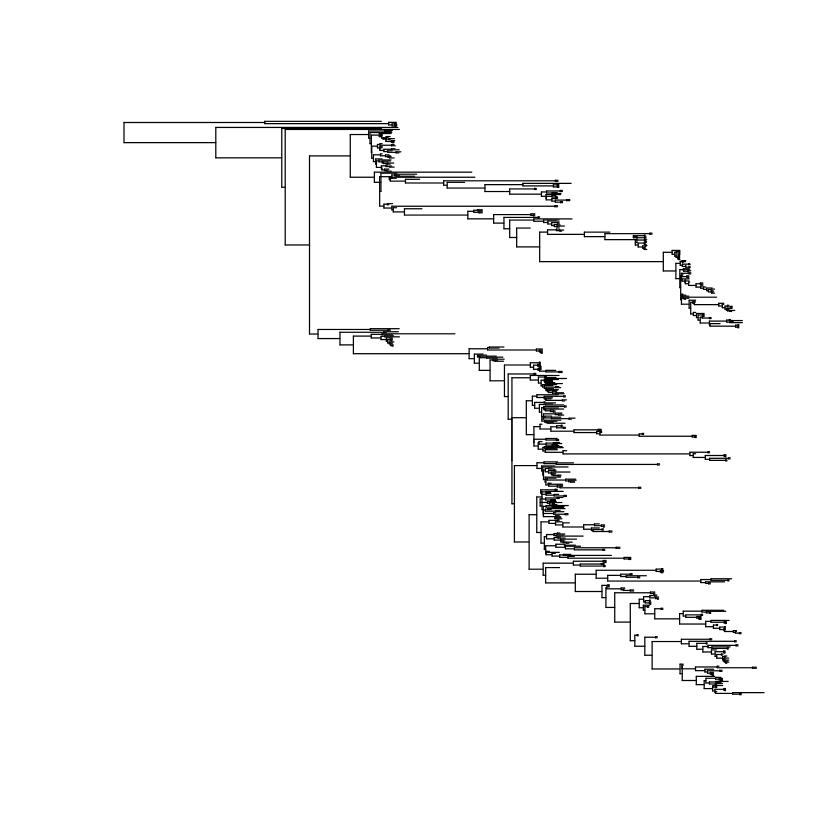

In [8]:
# plot the beast tree
plot(ladderize(H3N2_tree), show.tip.label = F)

# save the plot
svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/H3N2_tree.svg")
plot(ladderize(H3N2_tree), show.tip.label = F)
dev.off()

png 
  2

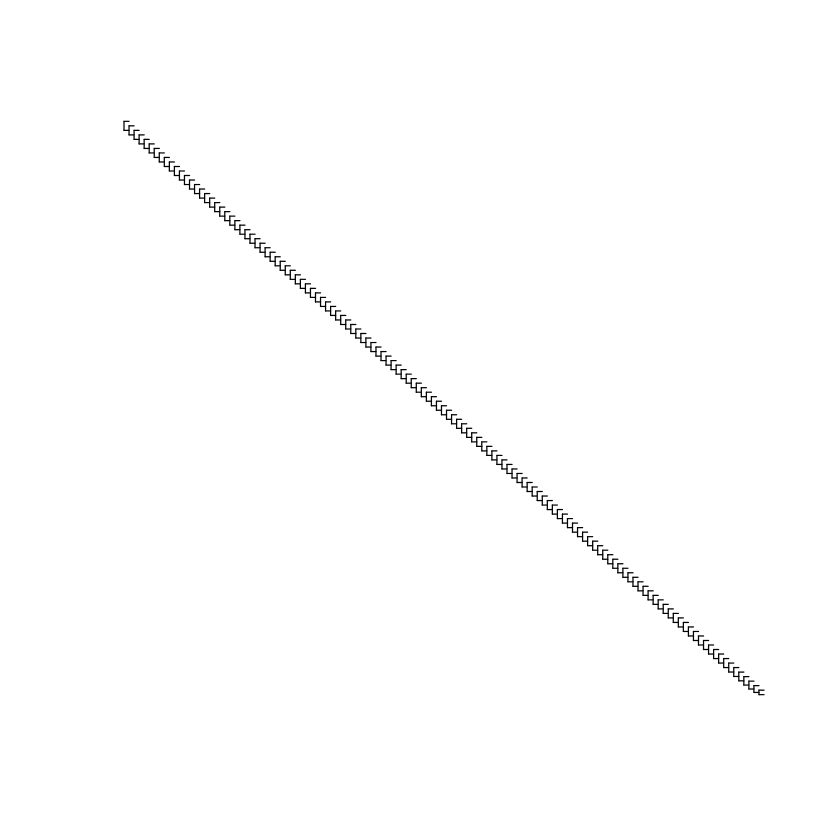

In [5]:
plot(catepillar_tree, show.tip.label = F,  use.edge.length = T)

svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/catepillar_tree.svg")
plot(ladderize(catepillar_tree), show.tip.label = F)
dev.off()

png 
  2

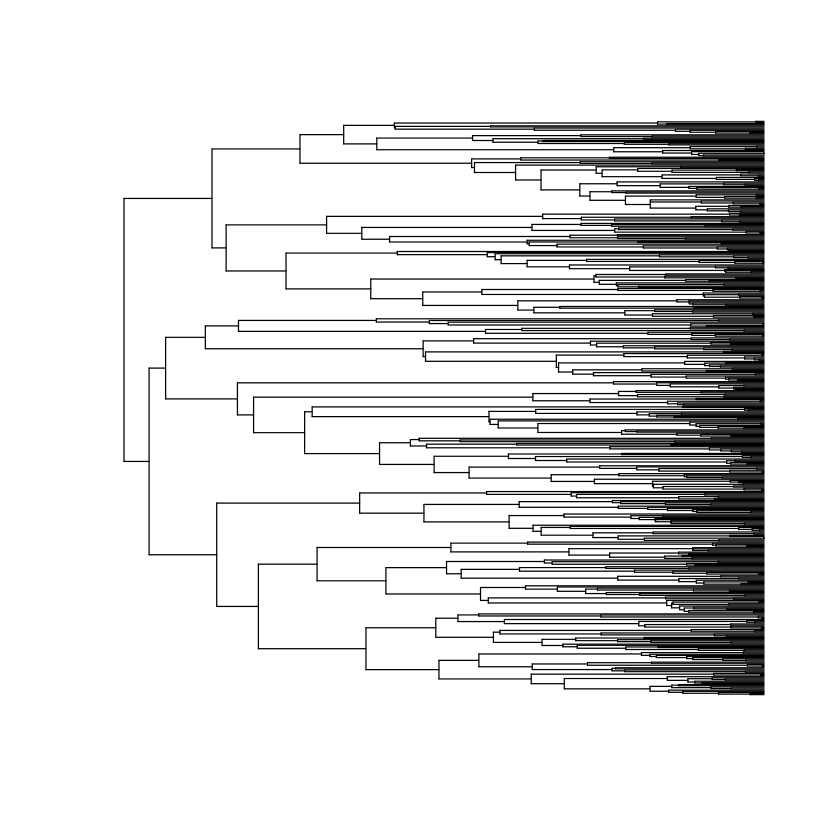

In [7]:
plot(ladderize(birth_death_tree), show.tip.label = F,  use.edge.length = T)

svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/birth_death_tree.svg")
plot(ladderize(birth_death_tree), show.tip.label = F)
dev.off()